In [ ]:
# https://urldefense.com/v3/__https://www.youtube.com/watch?v=WdXapAG6TYo*5Cn__;JQ!!DZ3fjg!8OMKV1Wm3pVuTREk9xpdoo7SXBBeE-7_ZXhaPifVHOMD5zrj5GL6zOoE2aV1dBvoyMd-L1By2-JmcmF68kI__-sJrg$ 
# https://urldefense.com/v3/__https://www.pycodemates.com/2022/10/implementing-SVM-from-scratch-in-python.html__;!!DZ3fjg!8OMKV1Wm3pVuTREk9xpdoo7SXBBeE-7_ZXhaPifVHOMD5zrj5GL6zOoE2aV1dBvoyMd-L1By2-JmcmF68kJqn0d5Bg$ 

In [2]:
# do pip install emnist to install the emnist dataset. 
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [3]:
from emnist import extract_training_samples, extract_test_samples
import numpy as np
import os
import matplotlib.pyplot as plt
images,train_labels = extract_training_samples('letters')
images2,test_labels = extract_test_samples('letters')
train_data = images.reshape(124800, -1)
test_data = images2.reshape(20800, -1)
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(124800, 784) (20800, 784)
(124800,) (20800,)


In [18]:
import numpy as np

class MultiClassSVM:
    def __init__(self, alpha=0.005, num_iter=3000, reg=0.01, num_classes=26):
        self.alpha = alpha  # LEARNING RATE
        self.num_iter = num_iter
        self.C = 1.0
        self.num_classes = num_classes
        self.losses = [[] for _ in range(self.num_classes)]


    def fit(self, X, Y):
        self.weights = np.zeros((self.num_classes, X.shape[1]))
        self.bias = np.zeros(self.num_classes)

        for class_label in range(self.num_classes):
            # Create binary labels for the current class
            binary_labels = np.where(Y == class_label, 1, -1) 
            self.train_binary_svm(X, binary_labels, class_label)

    def train_binary_svm(self, X, Y, class_label):

        w = np.zeros(X.shape[1])  # Weight vector
        b = 0  # Bias term

        num_samples = X.shape[0]

        # Training parameters
        alpha = self.alpha
        num_iter = self.num_iter

        for _ in range(num_iter):

            # Calculate the hinge loss and gradients
            margins = 1 - Y * (np.dot(X, w) + b)
            loss = self.C * np.maximum(0, margins).mean() + 0.5 * np.sum(w * w)  
            # Store the loss 
            self.losses[class_label].append(loss)
            # Calculating gradients
            dw = np.zeros(X.shape[1])
            db = 0

            # Update gradients using loss function  C * max(0, 1-(Y*(wx+b)))
            for i in range(num_samples):
                ti = Y[i] * (np.dot(w, X[i]) + b)
                if ti <= 1: #i.e. hinge loss = C*(1-(Y*(wx+b)))
                    dw -= self.C * Y[i] * X[i]
                    db -= self.C * Y[i]
 
            # Update weights and bias using gradients
            w -= alpha * dw
            b -= alpha * db

        # Store the learned weights and bias for this binary classifier
        self.weights[class_label] = w
        self.bias[class_label] = b


    def predict(self, X):
        scores = np.dot(X, self.weights.T) + self.bias
        return np.argmax(scores, axis=1)


Text(0.5, 1.0, 'Label: 1')

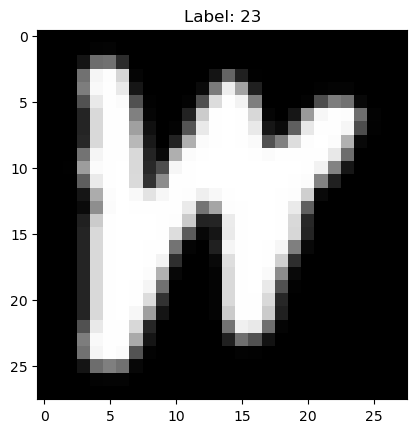

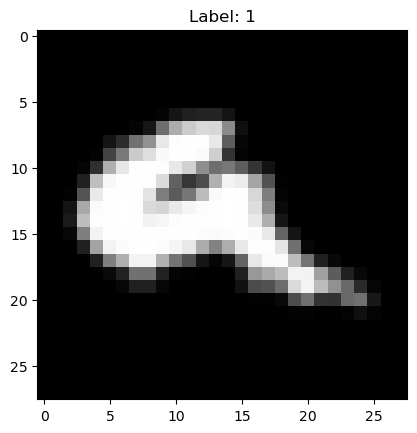

In [5]:
plt.figure()
plt.imshow(images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.figure()
plt.imshow(images2[0], cmap='gray')
plt.title(f"Label: {test_labels[0]}")

In [19]:
# train model

classifier = MultiClassSVM(alpha=0.01, num_iter=5000, reg=0.01, num_classes = 26)
classifier.fit(train_data, train_labels)
predictions = classifier.predict(test_data)

In [9]:
# pip install joblib to install this package 
#save this trained model 
import joblib
model_filename = "svm_model_0.1.pkl"
joblib.dump(classifier, model_filename)

['svm_model_0.1.pkl']

In [10]:
#load this trained model later
classifier = joblib.load(model_filename)
predictions = classifier.predict(test_data)

In [11]:
# Calculate the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
#if accuracy doesnt increase, try increasing the value of self.C to 10 or 0.1 
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 47.26%


In [26]:
num_classes=26
# Generate the confusion matrix
confusion = confusion_matrix(test_labels, predictions)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[595   4   7   8   0  11   0  40   0  17   0   0   1  88   0  13   0   0
    5   0   0   2   1   4   4   0]
 [ 14 632   1  15   0   8   0  51   0  27   0   0   2  18   1   2   0   0
   17   0   0   1   2   2   7   0]
 [ 45  13 652   5   0   5   0   1   3  13   0   0   1  19   2  16   0   0
   13   0   0   7   3   0   2   0]
 [ 49 111   4 366   0   2   0  54   0  76   0   0   3  59   5  29   0   0
   14   0   0  22   1   1   4   0]
 [186  67 307   1   0  37   0  12   0   8   0   0   6  27   0  38   0   0
   73   1   0  18   0   2  17   0]
 [ 14  11   2   1   0 639   0   1   0   6   0   0   3   7   0  81   0   0
    9   3   0   5   0   2  16   0]
 [193  60  44   4   0  79   5  22   0 109   0   0   4  27   0  33   0   0
  146   0   0   3   9   0  62   0]
 [ 45  17   4   6   0  12   0 549   0   9   0   0   9 102   0   5   0   0
    3   0   0  10   7  14   8   0]
 [ 48  22   2   2   0 102   0  12 211 167   0   0   0   0   1   9   0   0
   52   0   0  35   0  54  83   0]
 